In [1]:
import pandas as pd
import numpy as np

from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.xkcd()

import seaborn as sns
import os,sys

In [2]:
!ls datasets

factors_pf_returns.csv pf_factors.csv         sp500.csv
large_pf.csv           small_portfolio.csv


### Helper functions

In [3]:
def read_dataset(name,
                 data_path = './datasets',
                 sort_by = None, 
                 set_index = None,
                 ascending = True, 
                 days = True,
                 days_start = 0,
                 verbose = False,
                 ): 
    
    '''
        Read portfolio dataset
        
        Parameters:
            data_path: str, path to data folder
            sort_by: str, sort dataframe by column - name
            set_index: str, set a column as index
            ascending: Boolean, sort in ascending or descending order
            verbose: Boolean, whether to print date range or not
            days:Boolean, add a interger days since first record
            days_start: interger, starts from 0 or 1
            
        Returns:
            A time series dataframe
    
    '''
    
    datasets = {'factors_pf_returns': 'factors_pf_returns.csv',
                 'pf_factors': 'pf_factors.csv',
                 'sp500': 'sp500.csv',
                 'large_pf': 'large_pf.csv',
                 'small_portfolio': 'small_portfolio.csv'}
    
    dataset = os.path.join(data_path, datasets[name])
    df = pd.read_csv(dataset)    
    
    if sort_by:
        if verbose:
            print('Date range: {}'.format((df[sort_by].min(), df[sort_by].max())))
        df = df.sort_values(by = sort_by, ascending = ascending)
        
    if set_index:
        df = df.set_index(set_index)
        
    if days:
        df['days'] = np.arange(days_start, days_start + len(df))
        
    
    return df


def plot_portfolio(df, size = (12,8), title = 'Portfolio plot', xlabel = 'days', ylabel = 'value'):
    
    '''
        Plot trends for all columns,
        with x axis being an interger elapsed days
    '''
    
    if 'days' not in df.columns:
        raise ValueError("Must have an interger index (named days) representing elapsed days.")
    
    figsize(*size)
    df = df.set_index('days')
    df.plot(linewidth = 4)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc = 'upper left')
    plt.show()

    
def pct_change(df):
    
    '''
        Calcualte percent change of all columns except one interger time dimension named 'days'
        Input pandas dataframe
        Output pandas dataframe
    '''
    if df.index.name == 'date':
        if 'days' in df.columns:
            days = df.days
            df = df.drop('days', axis = 1).pct_change()
            df['days'] = days
            return df
        return df.pct_change()
    
    raise ValueError('Index is not date column')

## Small portfolio

Date range: ('2015-01-02', '2018-03-27')


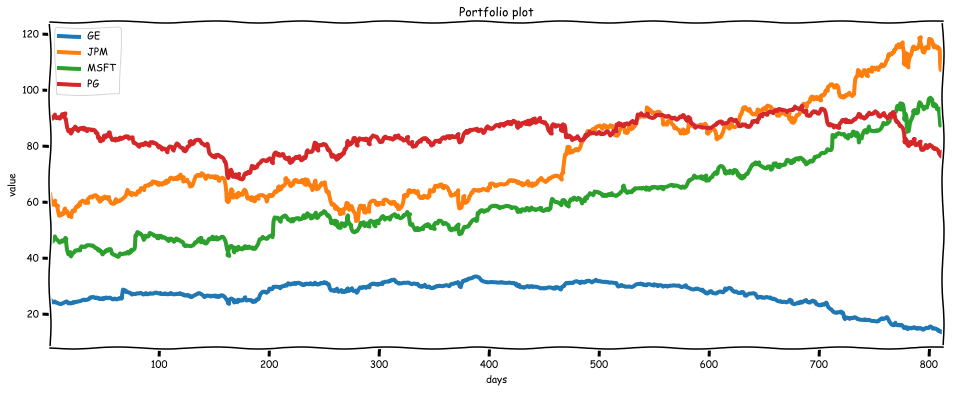

In [4]:
small = read_dataset('small_portfolio',
                     sort_by = 'date',
                     set_index = 'date',
                     days = True,
                     days_start = 1,
                     verbose = True)

plot_portfolio(small, size = (16,6))

**Average daily return for small portfolio**

```python
sum(weights_for_each_stock * avearge_daily_return_for_each_stock)
```

Use a dot operator to calculate daily portfolio returns

```python
d = pd.DataFrame(np.array([[1,2,3],[3,4,5,],[2,2,2]]))

>>>
array([[1, 2, 3],
       [3, 4, 5],
       [2, 2, 2]])

d.dot([1,1,1])

>>>
0     6
1    12
2     6
dtype: int64
```

In [5]:
weights = np.array([0.1,0.1,0.4,0.4])
portfolio_avg_daily_return = (small.drop('days', axis = 1).pct_change().mean() * weights).sum()
print('Average daily return of the portfolio is {}'.format(portfolio_avg_daily_return))

Average daily return of the portfolio is 0.00031447117948109094


**Daily portfolio return**

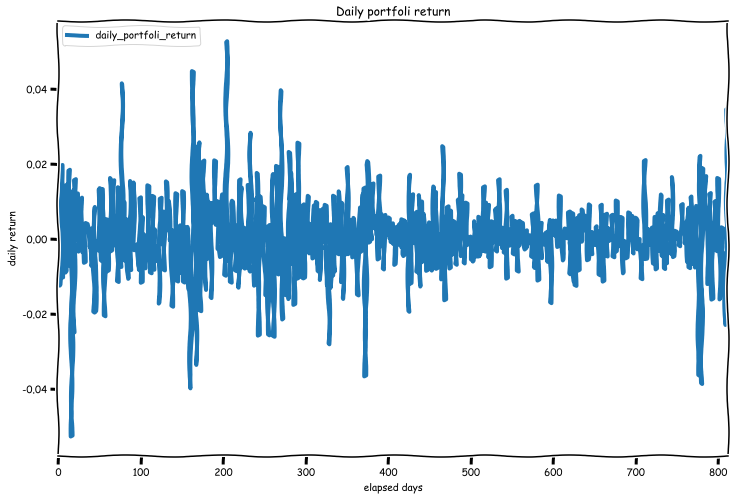

In [6]:
daily_portfolio_return = small.drop('days', axis = 1).pct_change().dot(weights)
daily_portfolio_return = pd.DataFrame(daily_portfolio_return,columns = ['daily_portfoli_return'])
daily_portfolio_return['days'] = np.arange(len(daily_portfolio_return))
plot_portfolio(daily_portfolio_return, title = 'Daily portfoli return', xlabel = 'elapsed days', ylabel = 'daily return')
plt.show()

**Cumulative return**

$r = (v_{t} - v_{t-1}) / v_{t-1}$            
$r v_{t-1} = v_{t} - v_{t-1}$        
$v_{t} = (1 + r)v_{t-1}$  

In [7]:
try:
    small.drop('days',axis = 1, inplace = True)
except Exception as e:
    print('Warning: days not in columne')
    

In [8]:
weights = np.array([0.1,0.4,0.4,0.1])
returns_df = small.pct_change()
returns_df['portfolio'] = returns_df.dot(weights)

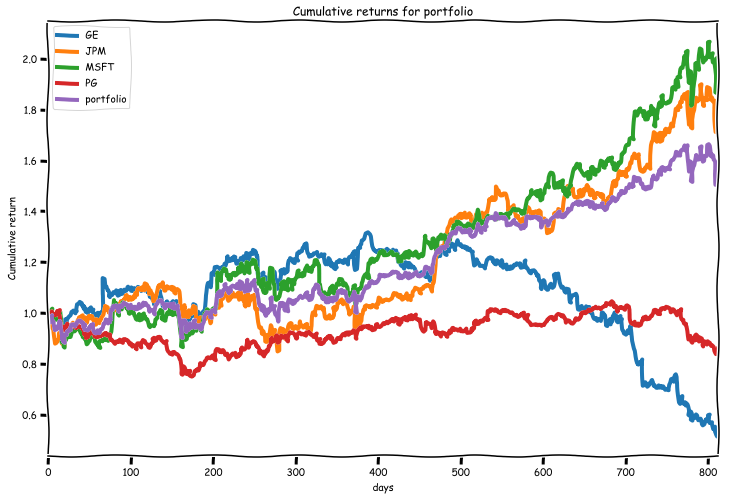

In [9]:
cumulative_returns = (1 + returns_df).cumprod()
cumulative_returns['days'] = np.arange(len(cumulative_returns))
plot_portfolio(cumulative_returns, title = 'Cumulative returns for portfolio', ylabel = 'Cumulative return')

In [10]:
cumulative_returns.tail()

,GE,JPM,MSFT,PG,portfolio,days
date,,,,,,
2018-03-21,0.553871,1.836134,1.977759,0.851835,1.595935,808
2018-03-22,0.532721,1.759482,1.920231,0.844870,1.543317,809
2018-03-23,0.521548,1.712434,1.864414,0.839341,1.504619,810
2018-03-26,0.514366,1.765242,2.005560,0.844870,1.567661,811
2018-03-27,0.536313,1.730997,1.913388,0.860128,1.536197,812


**Portfolio losses and gaining it back**   
First, let's develop our intuition for returns.                              
Did you know that when your portfolio copes with losses, it takes a lot of time to get back to the original level of wealth?                        
Because we are dealing with percentage increases and decreases, these changes are not linear in magnitude.                         
Suppose you invest 1000 on day 1 in a portfolio, and it loses 50% in that first day.                           
So that means on day 2, you start with a portfolio value of 500.                  
                      
So after a loss of 50%, what should the percentage return on day 2 be to get back to the initial investment value of 1000?    


v1 - v0 = 500 - 1000 = -500   
r1 = -500 / 100 = loss 50%    
v2 = 1000      
v2 - v1 = 1000 -500   
r2 = 500 / 500 = 100%   

You need 100% return to gain money back

/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/huan/anaconda/envs/py3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


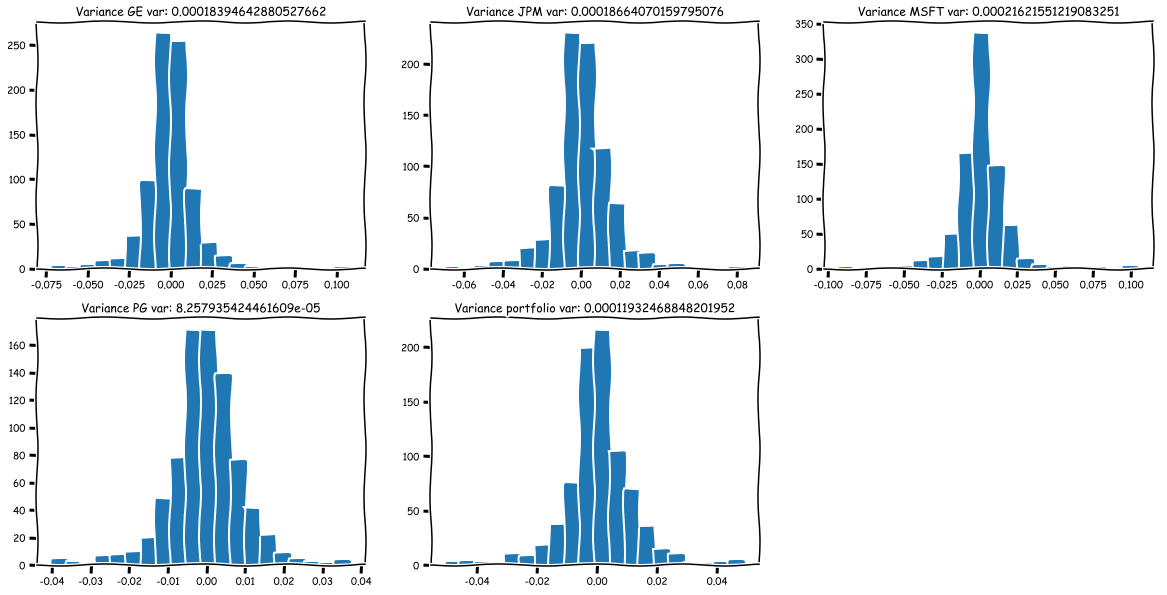

In [31]:
rows = len(returns_df.columns) // 2
cols = rows+1
variances = returns_df.var()
figsize(20,10)
for i,col in enumerate(returns_df.columns):
    plt.subplot(rows,cols,i+1)
    plt.hist(returns_df[col],bins = 20)
    plt.title('Variance {} var: {}'.format(col,variances[col]))
plt.show()

In [32]:
np.sqrt(returns_df.var())

GE           0.013563
JPM          0.013662
MSFT         0.014704
PG           0.009087
portfolio    0.010924
dtype: float64